Flight Price Prediction


dataset downloaded from:
https://www.kaggle.com/shubhambathwal/flight-price-prediction?select=Clean_Dataset.csv

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Flights/Clean_Dataset.csv')

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


INTRODUCTION
The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

Research Questions
The aim of our study is to answer the below research questions:
a) Does price vary with Airlines?
b) How is the price affected when tickets are bought in just 1 or 2 days before departure?
c) Does ticket price change based on the departure time and arrival time?
d) How the price changes with change in Source and Destination?
e) How does the ticket price vary between Economy and Business class?

FEATURES
The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different   airlines.

2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.

4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.

8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

11) Price: Target variable stores information of the ticket price.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

<AxesSubplot:xlabel='airline', ylabel='count'>

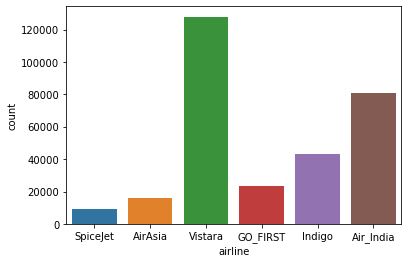

In [8]:
sns.countplot(data=df,x='airline')

<AxesSubplot:xlabel='airline', ylabel='price'>

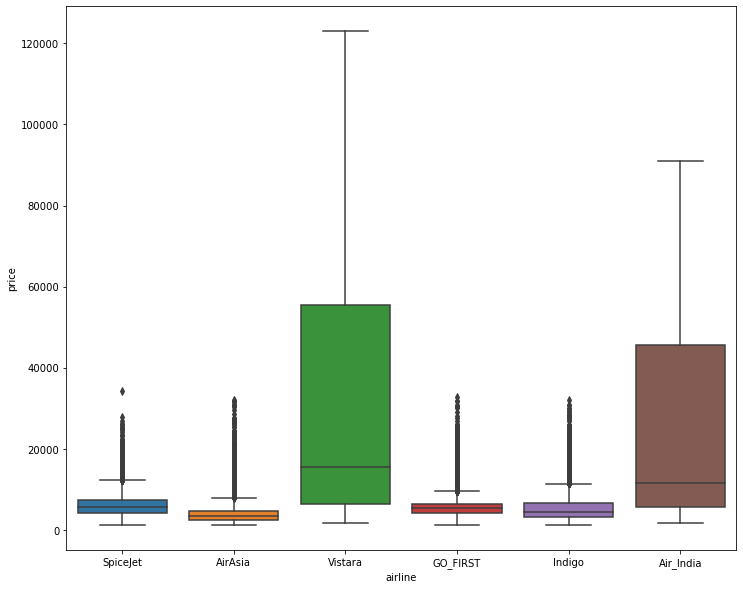

In [9]:
plt.figure(figsize=(12,10))
sns.boxplot(x='airline',y='price',data=df)

a) Does price vary with Airlines?

Yes, also, Vistara seems to be the most frequented airline in the dataset with the biggest price range, closely followed by Air India. The rest of the airlines represent a lower percentage of the data and have a much narrower price range.

In [10]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

<AxesSubplot:xlabel='days_left', ylabel='price'>

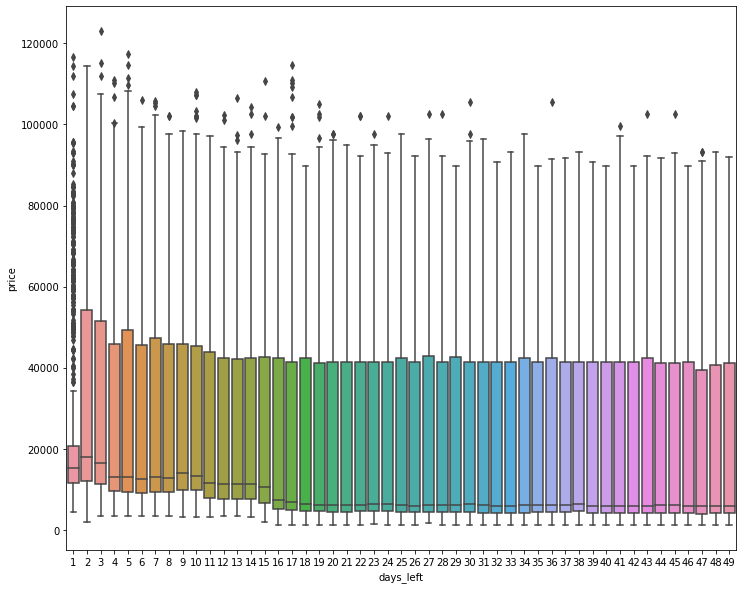

In [19]:
plt.figure(figsize=(12,10))
sns.boxplot(x='days_left',y='price',data=df)

In [31]:
df[df['days_left']<3].describe()

,Unnamed: 0,duration,days_left,price
count,5953.000000,5953.000000,5953.000000,5953.000000
mean,133621.025029,14.156123,1.676298,27421.169326
std,87193.754796,8.590693,0.467927,23236.028160
min,0.000000,0.920000,1.000000,1977.000000
25%,61599.000000,7.170000,1.000000,11843.000000
50%,119821.000000,13.080000,2.000000,16739.000000
75%,212034.000000,21.670000,2.000000,43193.000000
max,298094.000000,49.830000,2.000000,116562.000000


In [26]:
df[df['days_left']>2].describe()

,Unnamed: 0,duration,days_left,price
count,294200.000000,294200.000000,294200.000000,294200.000000
mean,150408.958756,12.181865,26.497026,20757.498484
std,86603.633378,7.155494,13.243825,22667.366491
min,251.000000,0.830000,3.000000,1105.000000
25%,75361.750000,6.750000,15.000000,4748.000000
50%,150664.500000,11.250000,27.000000,7347.000000
75%,225420.250000,16.080000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


b) How is the price affected when tickets are bought in just 1 or 2 days before departure?

The mean price value of flights bought close to departure (1 or 2 days prior) is higher than the mean price value of flights bought 3 or more days before departure.

In [35]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


<AxesSubplot:xlabel='departure_time', ylabel='price'>

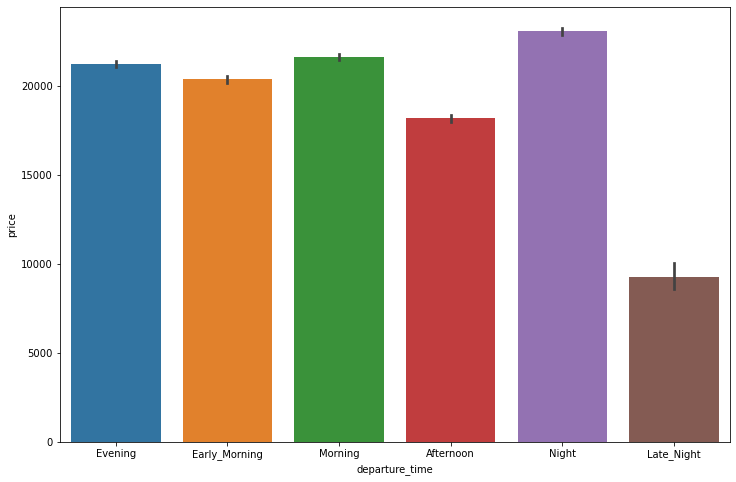

In [55]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x="departure_time", y="price")

<AxesSubplot:xlabel='departure_time', ylabel='price'>

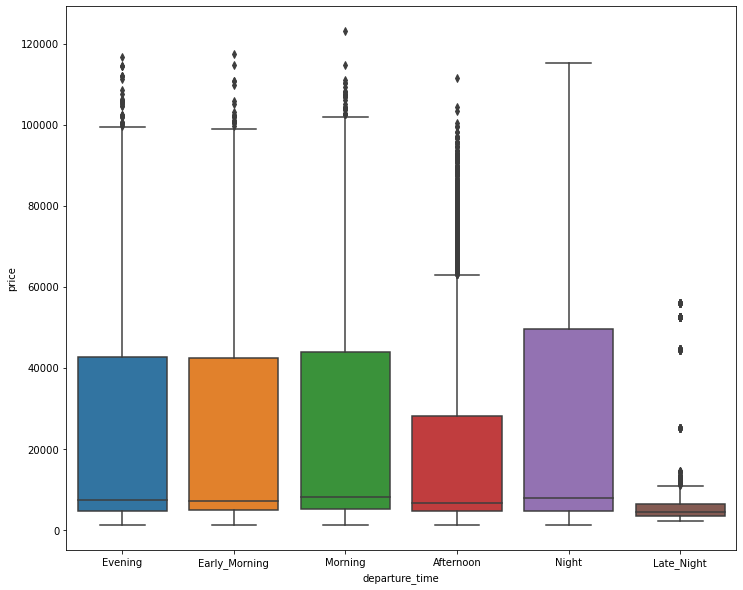

In [13]:
plt.figure(figsize=(12,10))
sns.boxplot(x='departure_time',y='price',data=df)

<AxesSubplot:xlabel='arrival_time', ylabel='price'>

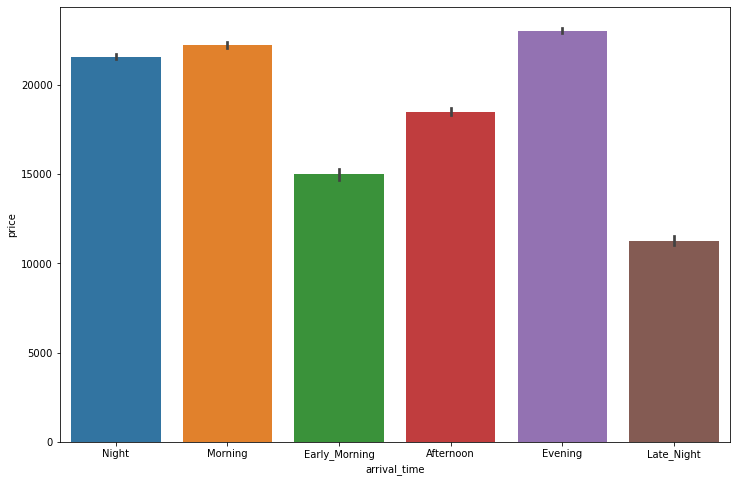

In [5]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x="arrival_time", y="price")

<AxesSubplot:xlabel='arrival_time', ylabel='price'>

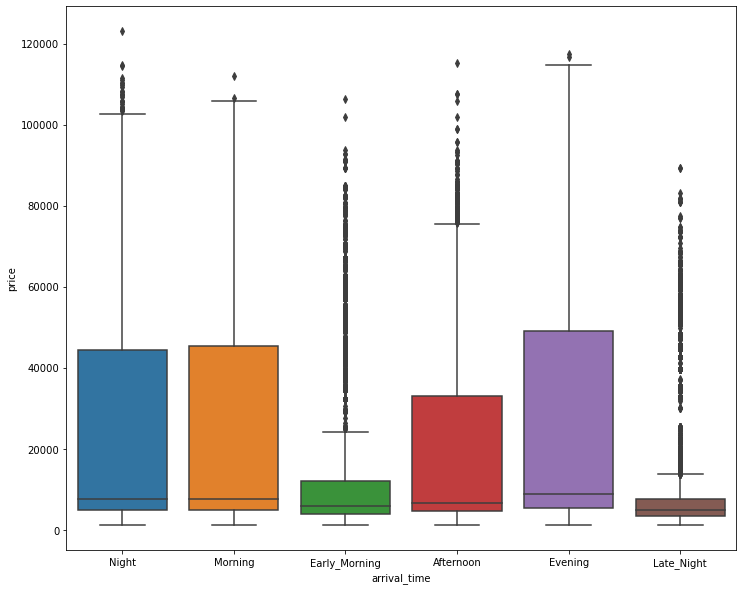

In [14]:
plt.figure(figsize=(12,10))
sns.boxplot(x='arrival_time',y='price',data=df)

c) Does ticket price change based on the departure time and arrival time?
The most noticeable difference in price comes from ticket flights with a departure in the late night, which we can guess that they would arrive in the late night or early morning, which are the 2 arrival times with the lowest price. 

In [6]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


<AxesSubplot:xlabel='source_city', ylabel='price'>

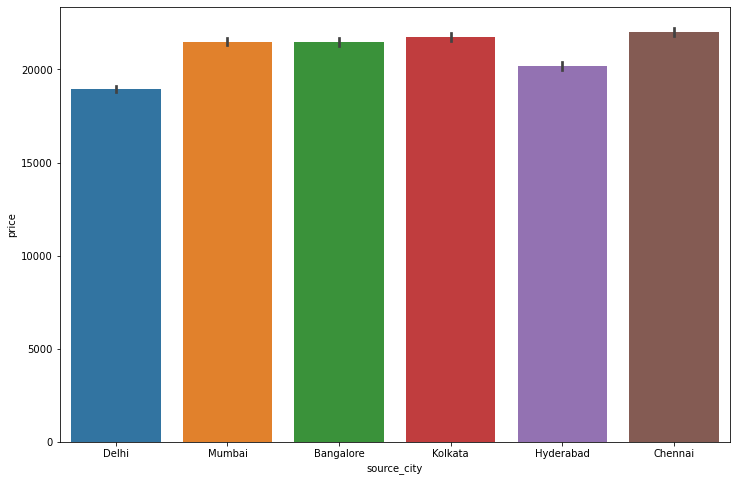

In [11]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x="source_city", y="price")

<AxesSubplot:xlabel='source_city', ylabel='price'>

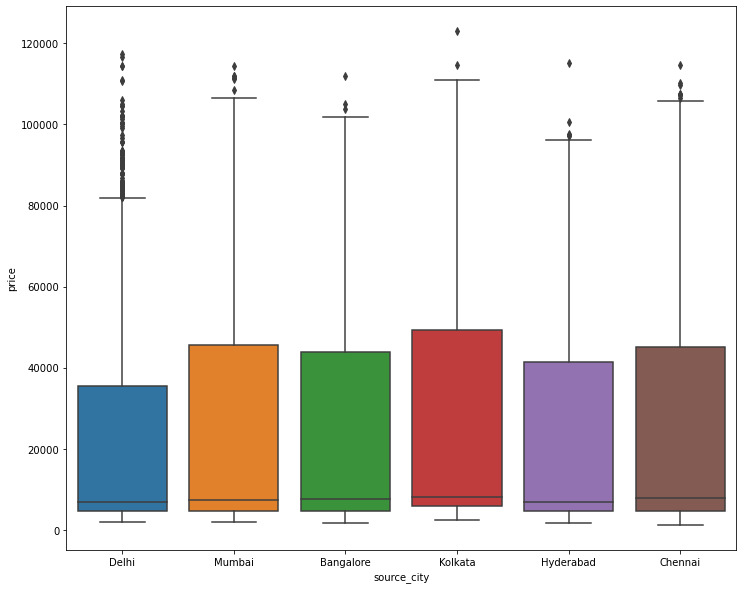

In [17]:
plt.figure(figsize=(12,10))
sns.boxplot(x='source_city',y='price',data=df)

<AxesSubplot:xlabel='destination_city', ylabel='price'>

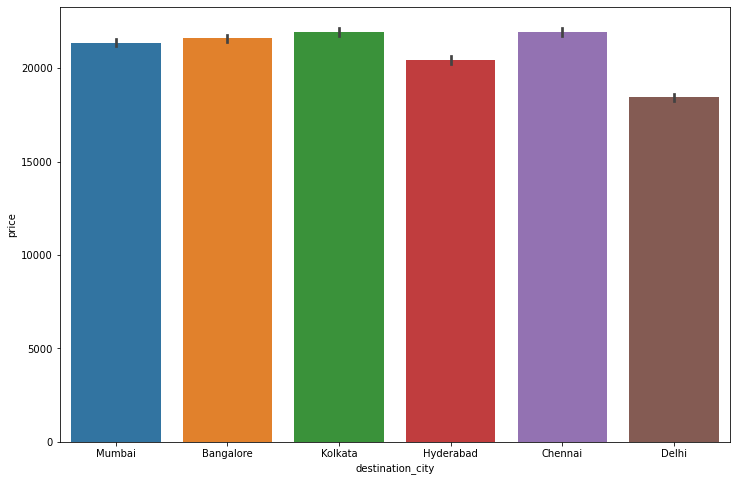

In [12]:
plt.figure(figsize=(12,8))
sns.barplot(data=df, x="destination_city", y="price")

<AxesSubplot:xlabel='destination_city', ylabel='price'>

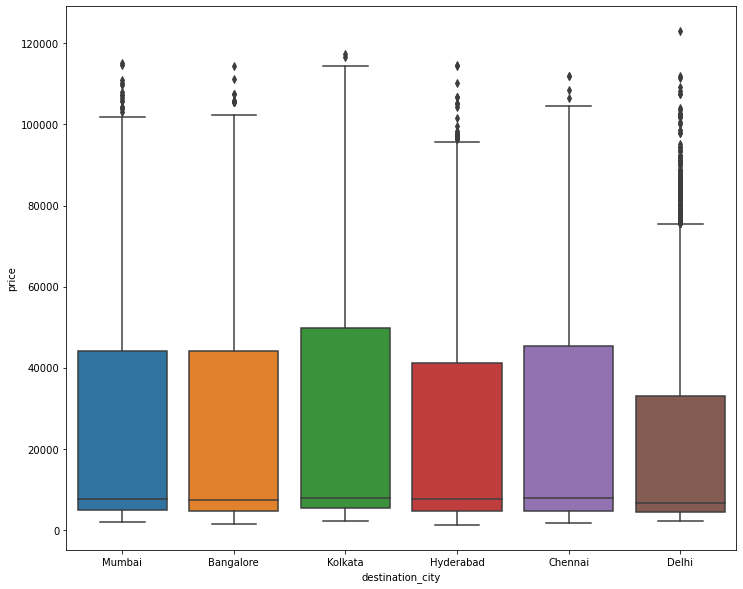

In [18]:
plt.figure(figsize=(12,10))
sns.boxplot(x='destination_city',y='price',data=df)

d) How the price changes with change in Source and Destination?
It appears that Source and Destination cities don't have a significant effect on the price. Delhi seems to be the city with the lowest prices in both cases.

<AxesSubplot:xlabel='class', ylabel='price'>

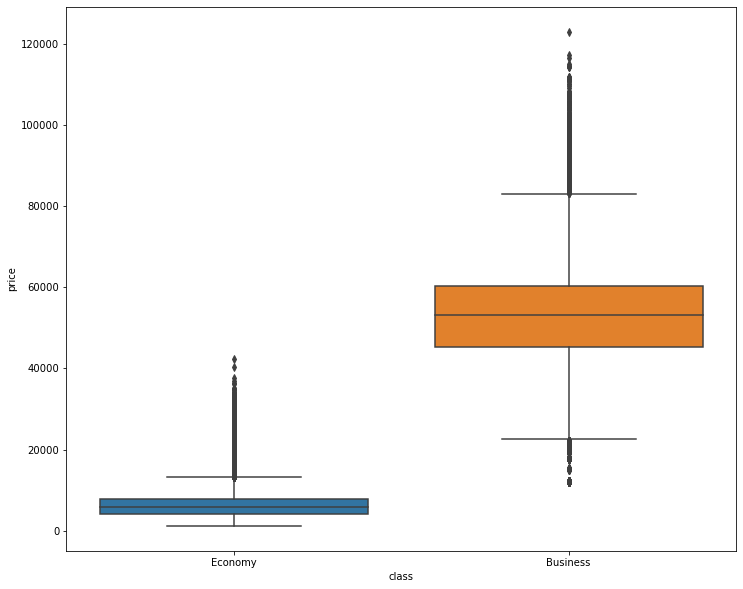

In [19]:
plt.figure(figsize=(12,10))
sns.boxplot(x='class',y='price',data=df)

<AxesSubplot:xlabel='price', ylabel='Count'>

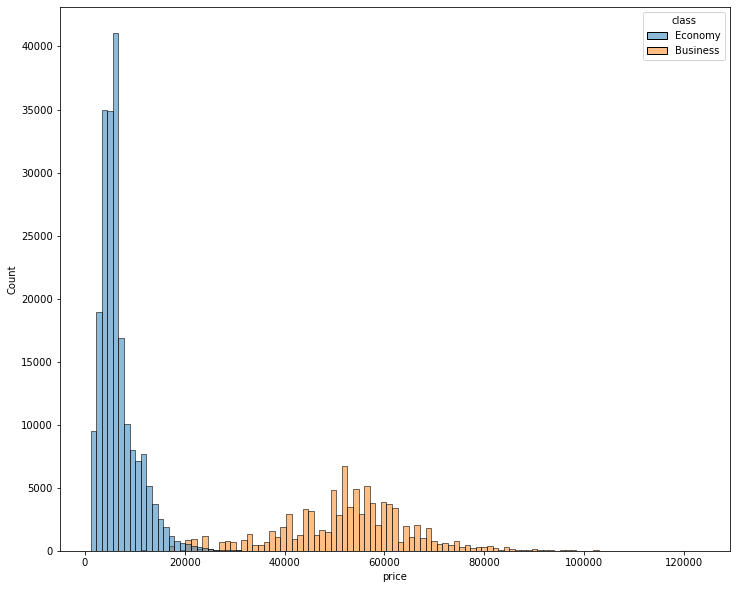

In [22]:
plt.figure(figsize=(12,10))
sns.histplot(data=df,x='price',hue='class')

e) How does the ticket price vary between Economy and Business class?

There is a big impact on the price value. Business class tickets are significantly more expensive

In [23]:
df['class'].value_counts()

Economy     206666
Business     93487
Name: class, dtype: int64

PREDICTION MODEL

In [24]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [37]:
df['flight'].nunique()

1561

The flight feature has too many unique values to include every category in our model. 

In [38]:
df=df.drop('flight',axis=1)

In [41]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [40]:
df=df.drop('Unnamed: 0',axis=1)

Now we will create dummy variables dor our categorical features with string variables.

In [42]:
df.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price'],
      dtype='object')

In [43]:
dummies = pd.get_dummies(df[['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class']],drop_first=True)
df = df.drop(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [45]:
df

,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
0,2.17,1,5953,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,1
1,2.33,1,5953,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,1
2,2.17,1,5956,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
3,2.25,1,5955,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,1
4,2.33,1,5955,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,10.08,49,69265,0,0,0,0,1,1,0,...,1,0,0,0,0,0,1,0,0,0
300149,10.42,49,77105,0,0,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
300150,13.83,49,79099,0,0,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
300151,10.00,49,81585,0,0,0,0,1,1,0,...,1,0,0,0,0,0,1,0,0,0


In [46]:
X = df.drop('price',axis=1)
y = df['price']

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
scaler = MinMaxScaler()

In [51]:
X_train= scaler.fit_transform(X_train)

In [52]:
X_test = scaler.transform(X_test)

In [56]:
X_test.shape

(90046, 30)

In [57]:
X_train.shape

(210107, 30)

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [69]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(8,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(4,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [70]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=130,epochs=400)

Epoch 1/400
1617/1617 [==============================] - 2s 1ms/step - loss: 555375872.0000 - val_loss: 141979696.0000
Epoch 2/400
1617/1617 [==============================] - 2s 1ms/step - loss: 172617360.0000 - val_loss: 52896460.0000
Epoch 3/400
1617/1617 [==============================] - 2s 1ms/step - loss: 159878784.0000 - val_loss: 46913248.0000
Epoch 4/400
1617/1617 [==============================] - 2s 1ms/step - loss: 158656560.0000 - val_loss: 47948476.0000
Epoch 5/400
1617/1617 [==============================] - 2s 1ms/step - loss: 157433344.0000 - val_loss: 42270636.0000
Epoch 6/400
1617/1617 [==============================] - 2s 1ms/step - loss: 153594224.0000 - val_loss: 38925484.0000
Epoch 7/400
1617/1617 [==============================] - 2s 1ms/step - loss: 153362816.0000 - val_loss: 50312904.0000
Epoch 8/400
1617/1617 [==============================] - 2s 1ms/step - loss: 155049104.0000 - val_loss: 43664476.0000
Epoch 9/400
1617/1617 [==============================] 

Epoch 70/400
1617/1617 [==============================] - 2s 1ms/step - loss: 137645504.0000 - val_loss: 55637068.0000
Epoch 71/400
1617/1617 [==============================] - 2s 1ms/step - loss: 138387760.0000 - val_loss: 48281700.0000
Epoch 72/400
1617/1617 [==============================] - 2s 1ms/step - loss: 136968960.0000 - val_loss: 55921512.0000
Epoch 73/400
1617/1617 [==============================] - 2s 1ms/step - loss: 138008464.0000 - val_loss: 52810844.0000
Epoch 74/400
1617/1617 [==============================] - 2s 1ms/step - loss: 137115280.0000 - val_loss: 49865300.0000
Epoch 75/400
1617/1617 [==============================] - 2s 1ms/step - loss: 138179936.0000 - val_loss: 62602740.0000
Epoch 76/400
1617/1617 [==============================] - 2s 1ms/step - loss: 137748032.0000 - val_loss: 55511768.0000
Epoch 77/400
1617/1617 [==============================] - 2s 1ms/step - loss: 137404416.0000 - val_loss: 56613176.0000
Epoch 78/400
1617/1617 [========================

1617/1617 [==============================] - 2s 1ms/step - loss: 132319616.0000 - val_loss: 50533508.0000
Epoch 207/400
1617/1617 [==============================] - 2s 1ms/step - loss: 132178728.0000 - val_loss: 50943652.0000
Epoch 208/400
1617/1617 [==============================] - 2s 1ms/step - loss: 132305712.0000 - val_loss: 49275848.0000
Epoch 209/400
1617/1617 [==============================] - 2s 1ms/step - loss: 132594704.0000 - val_loss: 50457580.0000
Epoch 210/400
1617/1617 [==============================] - 2s 1ms/step - loss: 132294104.0000 - val_loss: 54152924.0000
Epoch 211/400
1617/1617 [==============================] - 2s 1ms/step - loss: 132738864.0000 - val_loss: 58333260.0000
Epoch 212/400
1617/1617 [==============================] - 2s 1ms/step - loss: 132458792.0000 - val_loss: 59998108.0000
Epoch 213/400
1617/1617 [==============================] - 2s 1ms/step - loss: 131842776.0000 - val_loss: 45957784.0000
Epoch 214/400
1617/1617 [=============================

1617/1617 [==============================] - 2s 1ms/step - loss: 129448944.0000 - val_loss: 46965548.0000
Epoch 343/400
1617/1617 [==============================] - 2s 1ms/step - loss: 128797288.0000 - val_loss: 46949932.0000
Epoch 344/400
1617/1617 [==============================] - 2s 1ms/step - loss: 129221848.0000 - val_loss: 51281208.0000
Epoch 345/400
1617/1617 [==============================] - 2s 1ms/step - loss: 129773208.0000 - val_loss: 46311820.0000
Epoch 346/400
1617/1617 [==============================] - 2s 1ms/step - loss: 128929176.0000 - val_loss: 57406096.0000
Epoch 347/400
1617/1617 [==============================] - 2s 1ms/step - loss: 128427216.0000 - val_loss: 47003044.0000
Epoch 348/400
1617/1617 [==============================] - 2s 1ms/step - loss: 128666192.0000 - val_loss: 48454188.0000
Epoch 349/400
1617/1617 [==============================] - 2s 1ms/step - loss: 129777360.0000 - val_loss: 44851996.0000
Epoch 350/400
1617/1617 [=============================

In [71]:
losses = pd.DataFrame(model.history.history)

In [72]:
losses

,loss,val_loss
0,555375872.0,141979696.0
1,172617360.0,52896460.0
2,159878784.0,46913248.0
3,158656560.0,47948476.0
4,157433344.0,42270636.0
...,...,...
395,129402832.0,47582488.0
396,128335096.0,48995892.0
397,129591760.0,50069580.0
398,128690832.0,50897248.0


<AxesSubplot:>

<Figure size 864x576 with 0 Axes>

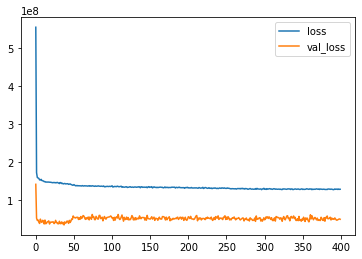

In [73]:
plt.figure(figsize=(12,8))
losses.plot()

In [74]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [75]:
predictions = model.predict(X_test)

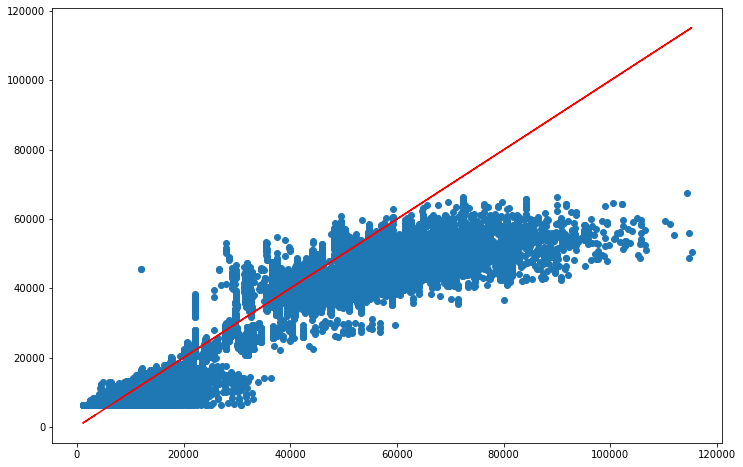

In [76]:
plt.figure(figsize=(12,8))
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [78]:
errors = y_test.values.reshape(90046, 1) - predictions

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

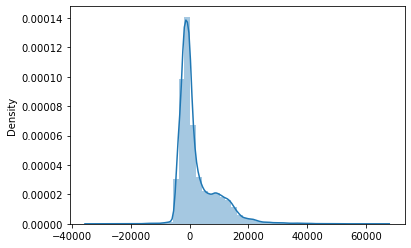

In [79]:
sns.distplot(errors)

Lets predict with our model using 2 random flights from the dataset

In [86]:
new_flight = df.drop('price',axis=1).iloc[666]

In [87]:
new_flight = scaler.transform(new_flight.values.reshape(-1, 30))

In [88]:
model.predict(new_flight)

array([[11574.16]], dtype=float32)

In [92]:
df.price.iloc[666]

10260

The prediction was 1314 more than the actual value.

In [90]:
new_flight = df.drop('price',axis=1).iloc[55555]
new_flight = scaler.transform(new_flight.values.reshape(-1, 30))
model.predict(new_flight)

array([[6839.7427]], dtype=float32)

In [93]:
df.price.iloc[55555]

7135

The prediction was 296 less than the actual value.